ModuleNotFoundError: No module named 'catboost'

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
df = pd.read_csv('/content/creditcard.csv')

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:
df.shape

(3973, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3973 non-null   int64  
 1   V1      3973 non-null   float64
 2   V2      3973 non-null   float64
 3   V3      3973 non-null   float64
 4   V4      3973 non-null   float64
 5   V5      3973 non-null   float64
 6   V6      3973 non-null   float64
 7   V7      3973 non-null   float64
 8   V8      3973 non-null   float64
 9   V9      3973 non-null   float64
 10  V10     3973 non-null   float64
 11  V11     3973 non-null   float64
 12  V12     3973 non-null   float64
 13  V13     3973 non-null   float64
 14  V14     3973 non-null   float64
 15  V15     3973 non-null   float64
 16  V16     3973 non-null   float64
 17  V17     3973 non-null   float64
 18  V18     3973 non-null   float64
 19  V19     3973 non-null   float64
 20  V20     3973 non-null   float64
 21  V21     3973 non-null   float64
 22  

In [14]:
df.Class.unique()

array([ 0.,  1., nan])

In [15]:
#Uneven class distribution
df.Class.value_counts()

0.0    3970
1.0       2
Name: Class, dtype: int64

In [16]:
nf = df[df.Class==0]
f = df[df.Class==1]

In [17]:
nf = nf.sample(738)

In [20]:
#Creating new dataframe
data = pd.concat([f, nf], ignore_index=True)


In [21]:
data.shape

(740, 31)

In [22]:
X = data.drop(['Class'],axis=1)
y=data['Class']


In [23]:
#Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [24]:
X_train.shape,X_test.shape

((592, 30), (148, 30))

In [25]:
#Applying StandardScaler to obtain all the features in similar range
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [26]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [27]:
#Reshaping the input to 3D.
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [28]:
#CNN model
model=Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 29, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 29, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0

In [30]:
#Compiling and Fiting
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
19/19 [==============================] - 3s 25ms/step - loss: 0.6429 - accuracy: 0.7230 - val_loss: 0.6399 - val_accuracy: 0.8851
Epoch 2/20
19/19 [==============================] - 0s 10ms/step - loss: 0.5081 - accuracy: 0.7872 - val_loss: 0.5406 - val_accuracy: 0.9730
Epoch 3/20
19/19 [==============================] - 0s 10ms/step - loss: 0.4435 - accuracy: 0.8226 - val_loss: 0.4360 - val_accuracy: 1.0000
Epoch 4/20
19/19 [==============================] - 0s 10ms/step - loss: 0.3866 - accuracy: 0.8699 - val_loss: 0.3486 - val_accuracy: 1.0000
Epoch 5/20
19/19 [==============================] - 0s 11ms/step - loss: 0.2629 - accuracy: 0.9037 - val_loss: 0.2725 - val_accuracy: 1.0000
Epoch 6/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2435 - accuracy: 0.9088 - val_loss: 0.2038 - val_accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 0s 10ms/step - loss: 0.2501 - accuracy: 0.9257 - val_loss: 0.1490 - val_accuracy: 1.0000
Epoch 8/20
19

In [32]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

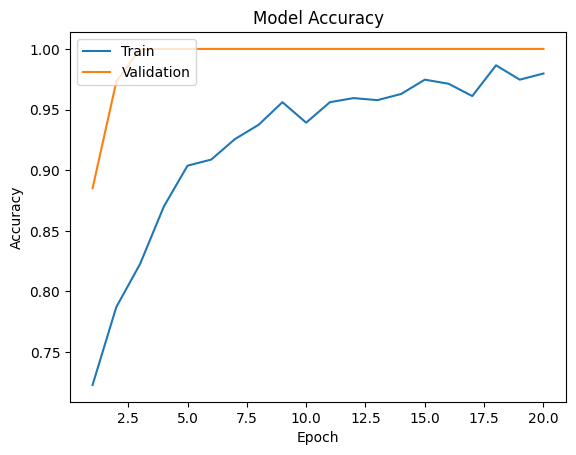

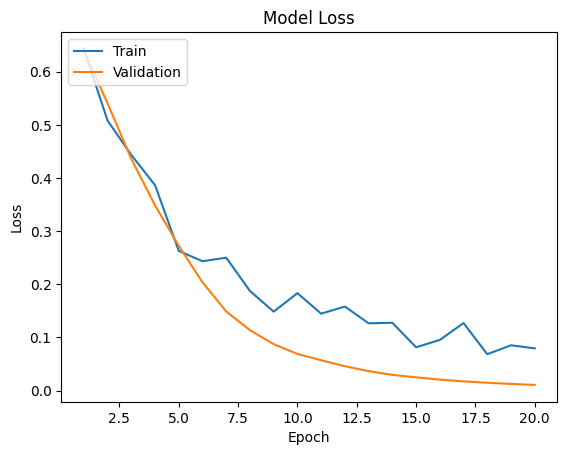

In [33]:
plotLearningCurve(history,20)